# Bayesian exploration using script

In [1]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

import os
SMOKE_TEST = os.environ.get('SMOKE_TEST')

from xopt.bayesian.algorithms import bayesian_exploration

# test function
from xopt.tests.evaluators import TNK

In [2]:
# To see log messages
from xopt import output_notebook
output_notebook()

In [3]:
# Get VOCS
VOCS = TNK.VOCS

# technically this is not necessary, but its good to be explict
VOCS['objectives'] = {'y1' : None}

# Get evaluate function
EVALUATE = TNK.evaluate_TNK

n_steps = 30
generator_options = {}


if SMOKE_TEST:
    generator_options = {'batch_size': 1,
                           'num_restarts': 2,
                           'raw_samples': 2}
    n_steps = 3

# Run - see comments for example options
results = bayesian_exploration(VOCS, EVALUATE,
                               n_initial_samples=5,                   ## Specify number of initial random samples
                               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
                               n_steps=n_steps,                       ## number of optimization step
                               generator_options=generator_options)

started running optimization with generator: <xopt.bayesian.generators.exploration.BayesianExplorationGenerator object at 0x12f642190>
submitting initial candidates
starting optimization loop
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates


dict_keys(['variables', 'objectives', 'corrected_objectives', 'constraint_status', 'feasibility', 'model', 'constraints', 'corrected_constraints'])


Text(0, 0.5, '$x_2$')

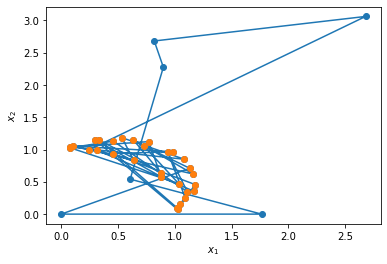

In [4]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o')
ax.plot(valid[:, 0], valid[:, 1], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

### Bayesian exploration with proximal biasing
- should result in a smoother path through input space

In [5]:
# Get VOCS
VOCS = TNK.VOCS

# technically this is not necessary, but its good to be explict
VOCS['objectives'] = {'y1' : None}
# Get evaluate function
EVALUATE = TNK.evaluate_TNK
n_steps = 30

generator_options = {'sigma': torch.eye(2) * 0.5,            ## Specify proximal term (requires batch_size = 1)
                     #'batch_size': 5,                       ## Specify batched exploration
                     # 'custom_model': myCustomModel,        ## Specify custom model creation function
                     # 'use_gpu': False,                         ## Use GPU (if available)
                    }
if SMOKE_TEST:
    generator_options = {'batch_size': 1,
                           'num_restarts': 2,
                           'raw_samples': 2}
    n_steps = 3

# Run - see comments for example options
results = bayesian_exploration(VOCS, EVALUATE,
                               generator_options = generator_options,
                               n_initial_samples=5,                   ## Specify number of initial random samples
                               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
                               n_steps=n_steps,                       ## number of optimization step
                               # restart_data_file = 'results.json',  ## restart optimization file
                            )

started running optimization with generator: <xopt.bayesian.generators.exploration.BayesianExplorationGenerator object at 0x12f642a60>
submitting initial candidates
starting optimization loop
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates


dict_keys(['variables', 'objectives', 'corrected_objectives', 'constraint_status', 'feasibility', 'model', 'constraints', 'corrected_constraints'])


Text(0, 0.5, '$x_2$')

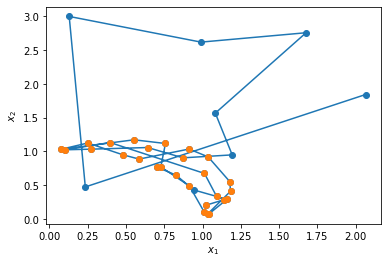

In [6]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o')
ax.plot(valid[:, 0], valid[:, 1], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')